# Introduction 

Group: August Meyers and Connor Wiltse 

Dataset: Dataset19 (Deaths/Diseases by country)

All of the graphs in this notebook use Pandas to create a dataframe from the input CSV with the Pandas.read_csv method. With that we can easily manipulate the data in the form of the dataframe through other libraries such as matplotlib, seaborn, and numpy. 

This graph uses primarily matplotlib to graph correlations from pandas index values. 

Furthemore, we can utilize the pandas correlation function to generate a Spearman correlation from that data. 

### Global Deaths By Cause
This code and resulting graph is to explore the hypothesis that the primary causes of death should likely be chronic diseases since most of the world is able to live into old age and these are diseases of old age.

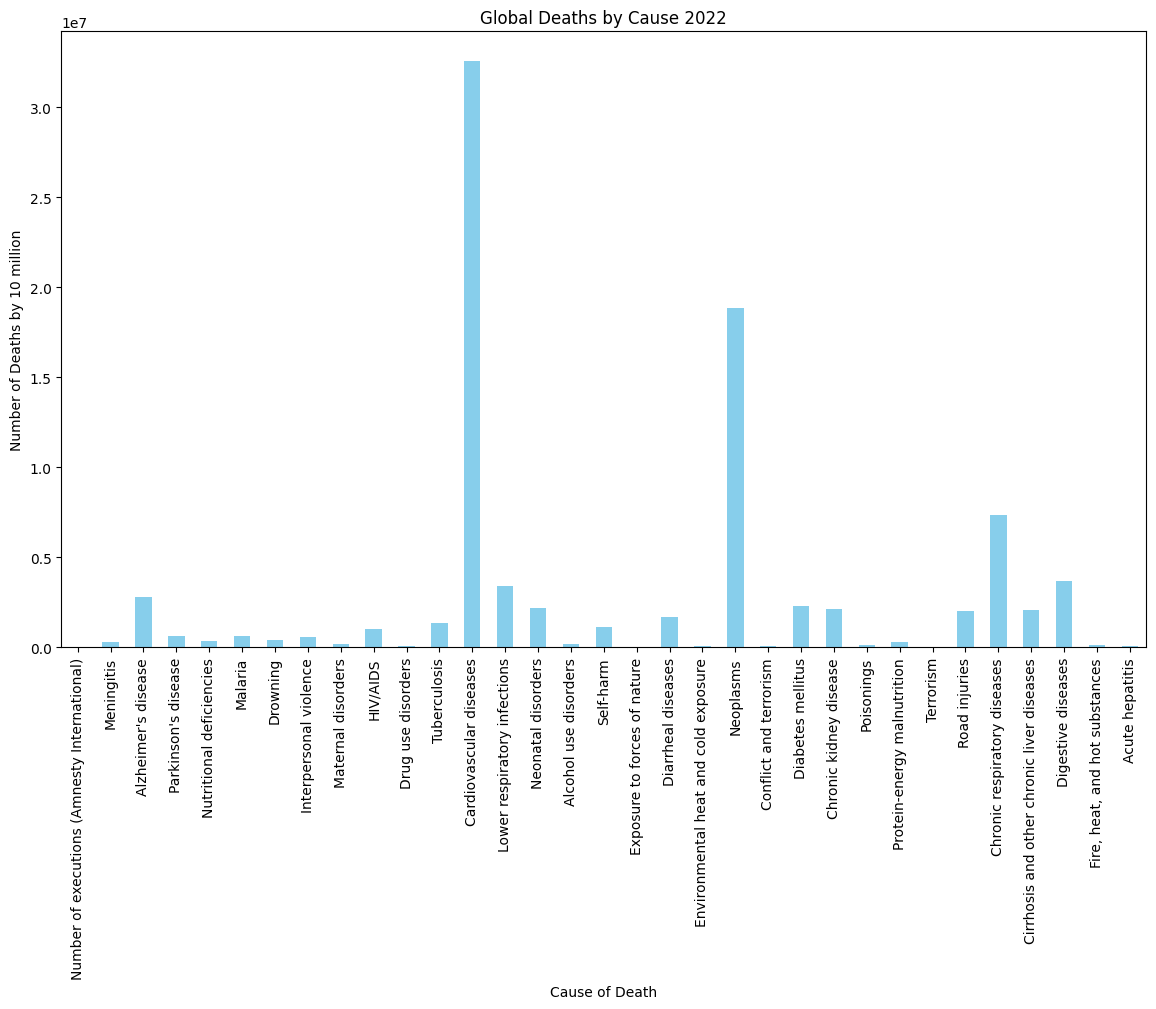

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset19.csv")
df = df[df['Year'] == 2022]
df = df.drop(columns=['Location', 'TPopulation1July', 'PopDensity', 'DoublingTime', 'Births', 'Deaths', 'Code', 'co2_emissions', 'alcohol_consumption', 'Year'], axis=1)


# Convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_sum = df.sum()
df_sum.plot(kind='bar', figsize = (14, 8), color='skyblue')

plt.title('Global Deaths by Cause 2022')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths by 10 million')
plt.xticks(rotation=90)  # Rotate the labels to make them readable

plt.show()

### Graph of Infectious Diseases Over Time
This code and graph is here to explore the hypothesis that infectious diseases should be less common with greater economic development.

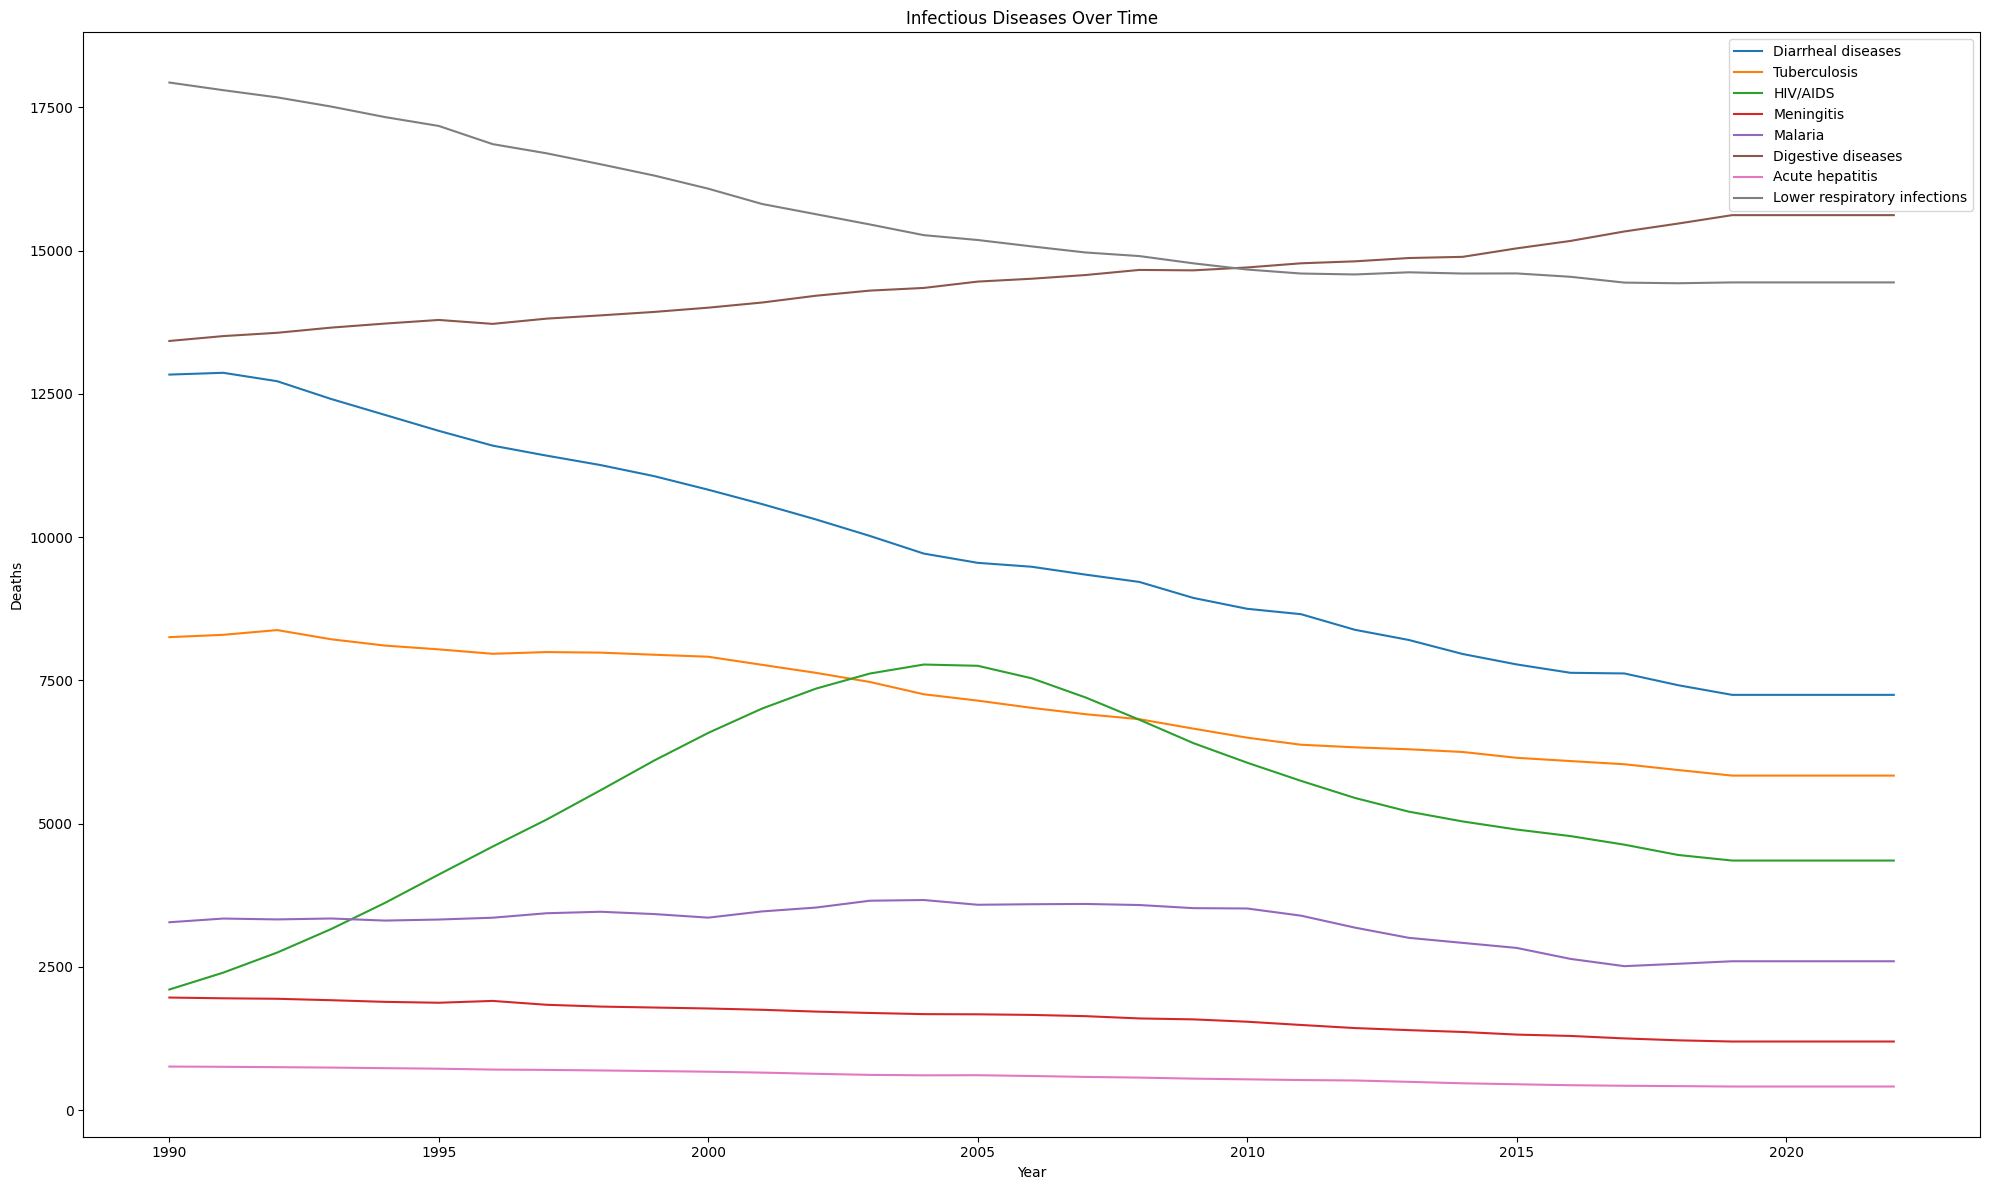

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset19.csv", index_col=1)

# Dropping specified columns
df = df.drop(columns=['Location', 'TPopulation1July', 'PopDensity', 'DoublingTime', 'Births', 'Deaths', 'Code', 'alcohol_consumption', 'Cardiovascular diseases', 'Parkinson\'s disease', 'Alzheimer\'s disease', 'Alcohol use disorders', 'Chronic kidney disease', 'Chronic respiratory diseases', 'Cirrhosis and other chronic liver diseases', 'Neoplasms', 'Self-harm'], axis=1)
df = df[['Diarrheal diseases', 'Tuberculosis', 'HIV/AIDS', 'Meningitis', 'Malaria', 'Digestive diseases', 'Acute hepatitis', 'Lower respiratory infections']]
# Convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 1, figsize=(20, 12))  # Corrected this line

# Plot for CO2 Emissions
means = df.groupby('Year').mean()
for col in df.columns:
    axs.plot(means.index, means[col], label=col)

axs.set_title('Infectious Diseases Over Time')
axs.set_xlabel('Year')
axs.set_ylabel('Deaths')
axs.legend()

plt.tight_layout()
plt.show()


### Graph of Chronic Diseases over time
This code and graph is here to explore the idea that chronic diseases likely will become more common with greater economic development as more people live into old age.

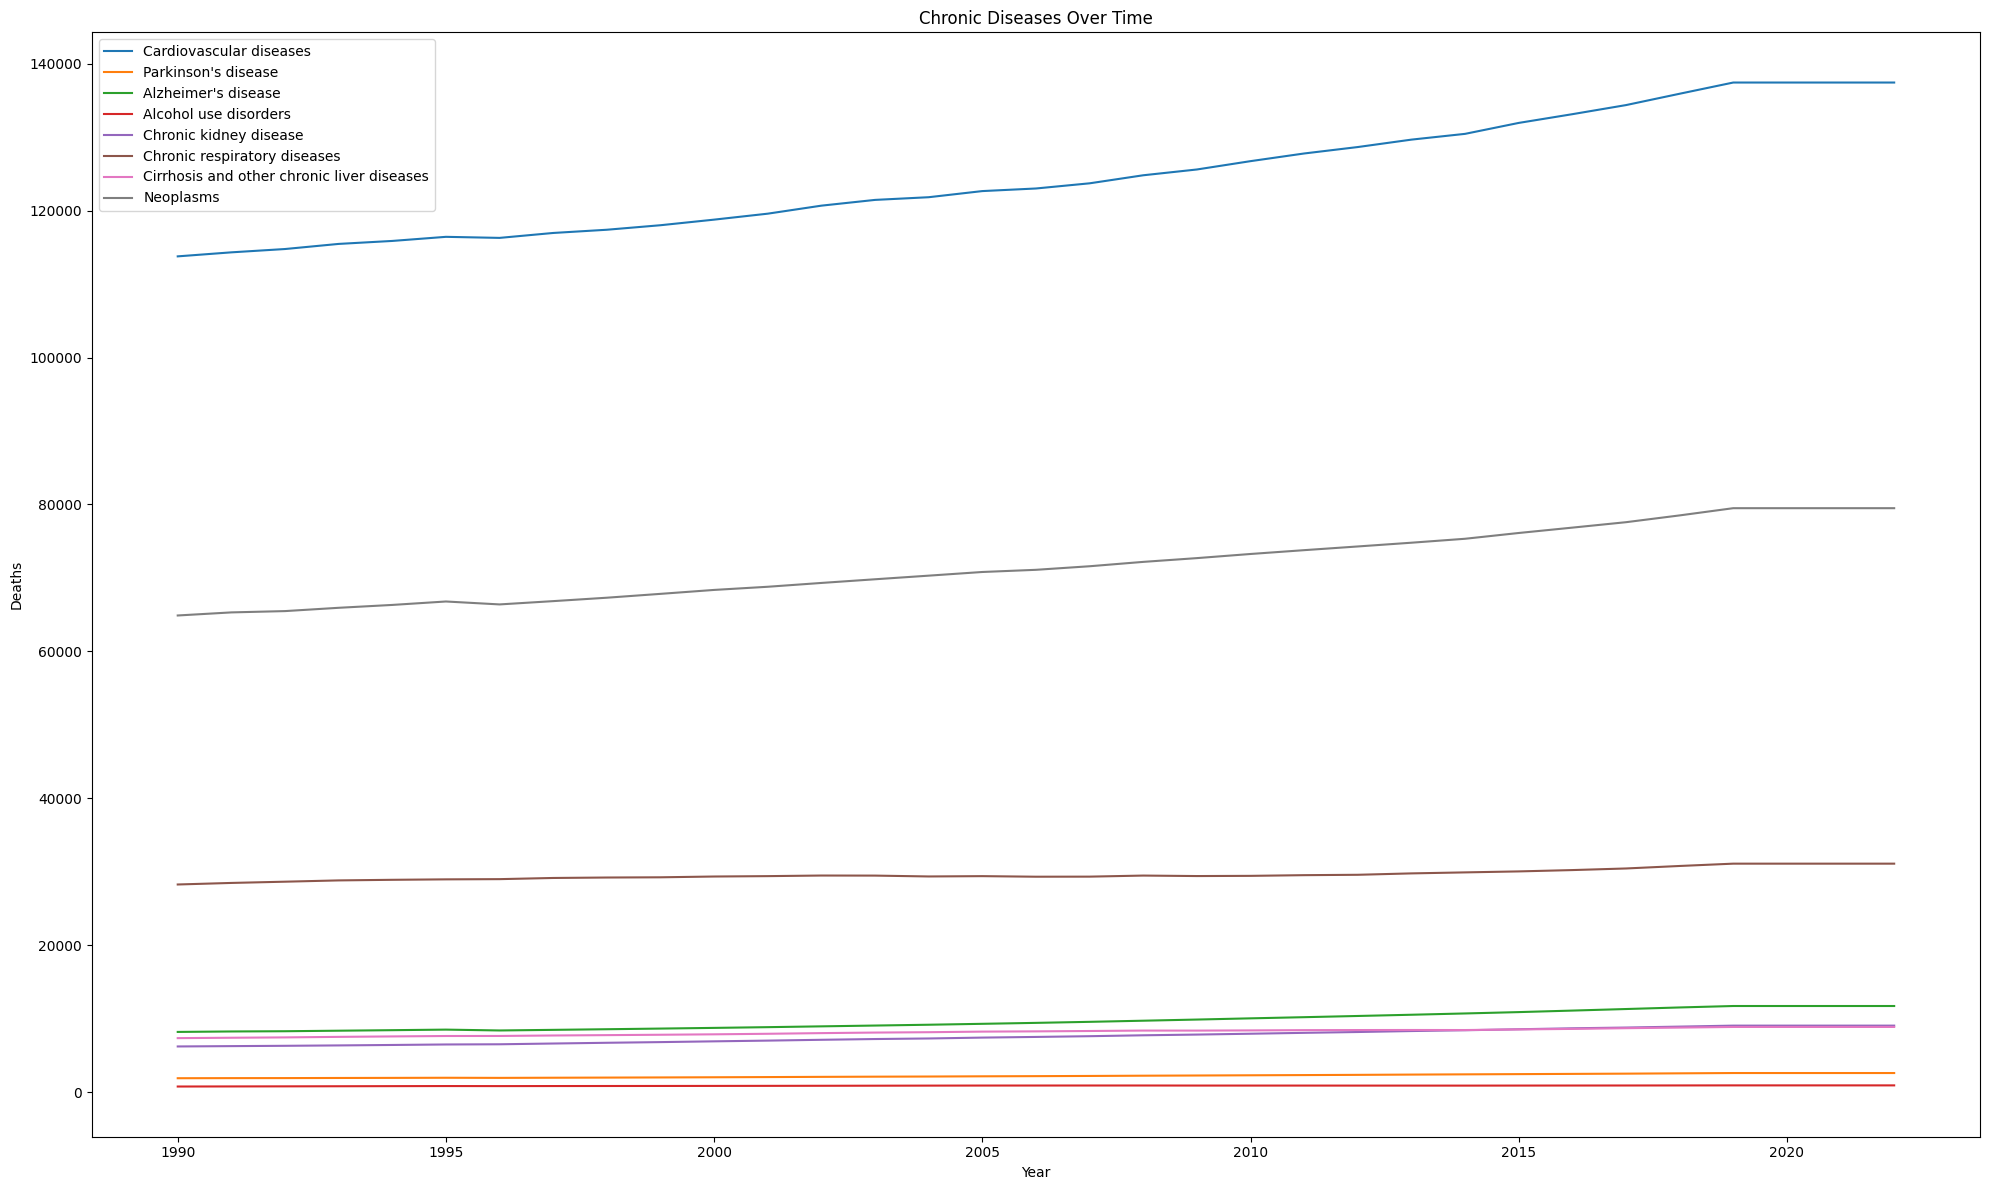

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset19.csv", index_col=1)

# Dropping specified columns
df = df.drop(columns=['Location', 'TPopulation1July', 'PopDensity', 'DoublingTime', 'Births', 'Deaths', 'Code', 'alcohol_consumption', 'Self-harm'], axis=1)
df = df[['Cardiovascular diseases', 'Parkinson\'s disease', 'Alzheimer\'s disease', 'Alcohol use disorders', 'Chronic kidney disease', 'Chronic respiratory diseases', 'Cirrhosis and other chronic liver diseases', 'Neoplasms']]
# Convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 1, figsize=(20, 12))  # Corrected this line

# Plot for CO2 Emissions
means = df.groupby('Year').mean()
for col in df.columns:
    axs.plot(means.index, means[col], label=col)

axs.set_title('Chronic Diseases Over Time')
axs.set_xlabel('Year')
axs.set_ylabel('Deaths')
axs.legend()

plt.tight_layout()
plt.show()


### Heatmap of correlations

This uses Numpy to generate correlations and then Seaborn to create a heatmap from that correlation matrix

The graph shows more correlations that may have not been see from individual graphs in order to find new relationships

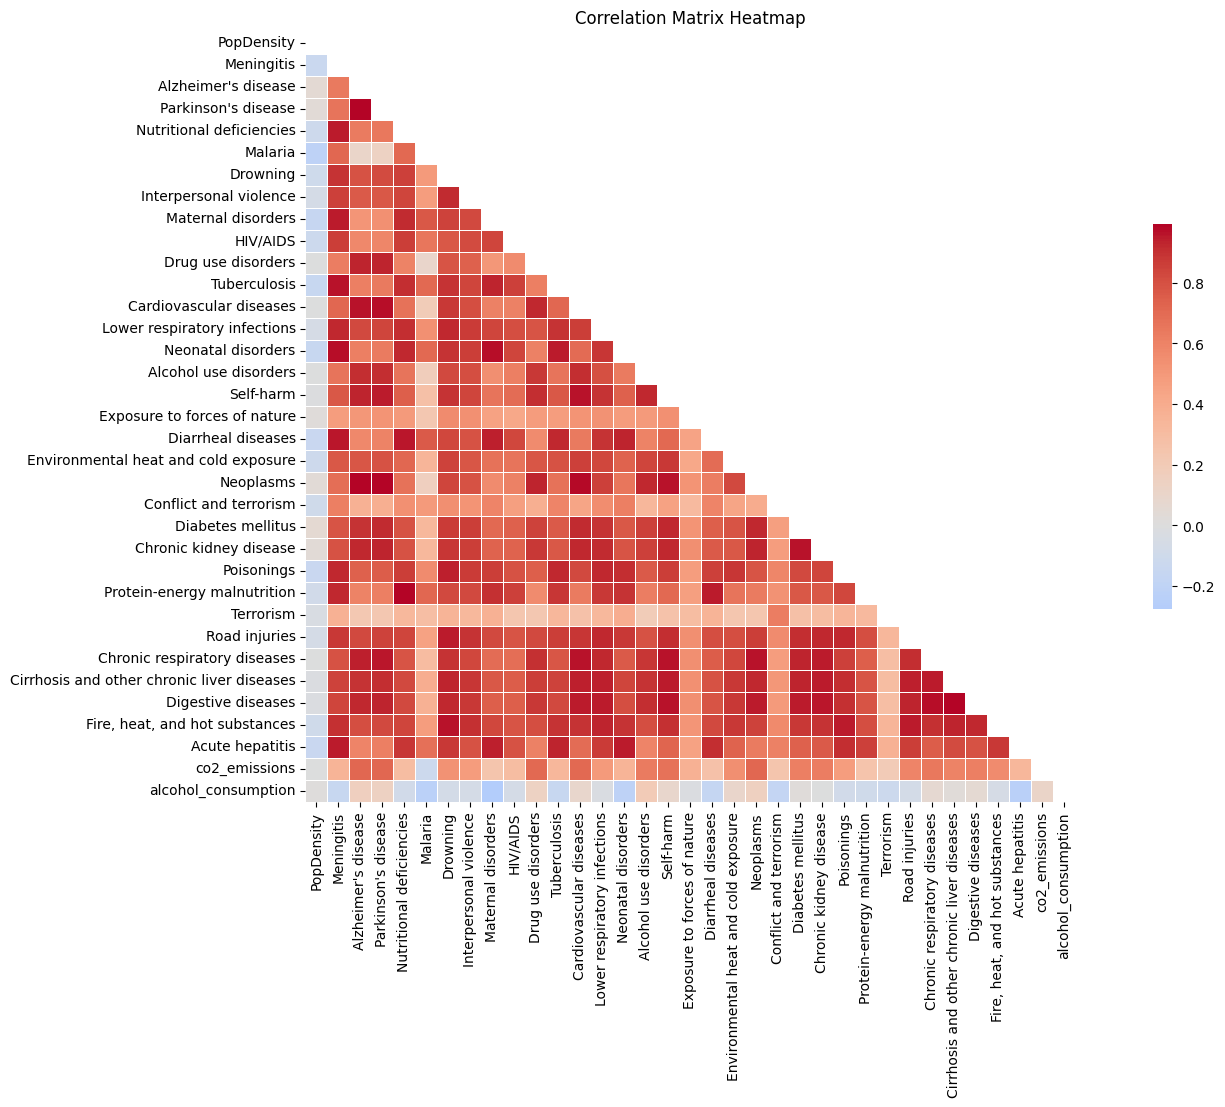

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("Dataset19.csv", index_col=1)
df = df.drop(columns=['Location', 'TPopulation1July', 'DoublingTime','Births','Deaths', 'Code', 'Number of executions (Amnesty International)'], axis=1)

corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(20, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert columns to numeric
for col in df.columns:
    if col != 'Year':  # Assuming 'Year' is already of the correct type
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})

# Customize the plot with labels and a title as needed
plt.title('Correlation Matrix Heatmap')
plt.show()

### Forming a hypothesis

With a dataset the size of ours, it was a little hard to find the right data to make observations with. There are data points for 20+ causes of death, spread across almost every country, and through multiple years. In total there are almost 8,000 lines of data in the csv. 

Doing our rudimentary exploratory analysis some obvious correlations were made, such as alcohol and liver failure or co2 and forces of nature, but another strong correlation was that between deaths/births and population density

Without actually looking at the data, my hypothesis would be that a higher population density equals a higher birth rate and deathrate, whereas a lower population density forms a lower birth and death rate. 

We can then back that up using our Python data analytics libraries 

First of all, by doing a very rudimentary histogram with seaborn, we can see the spread of countries with population density, death, and births. Interestingly, the rates are all very pretty low outside of a few countries with way higher population density than others

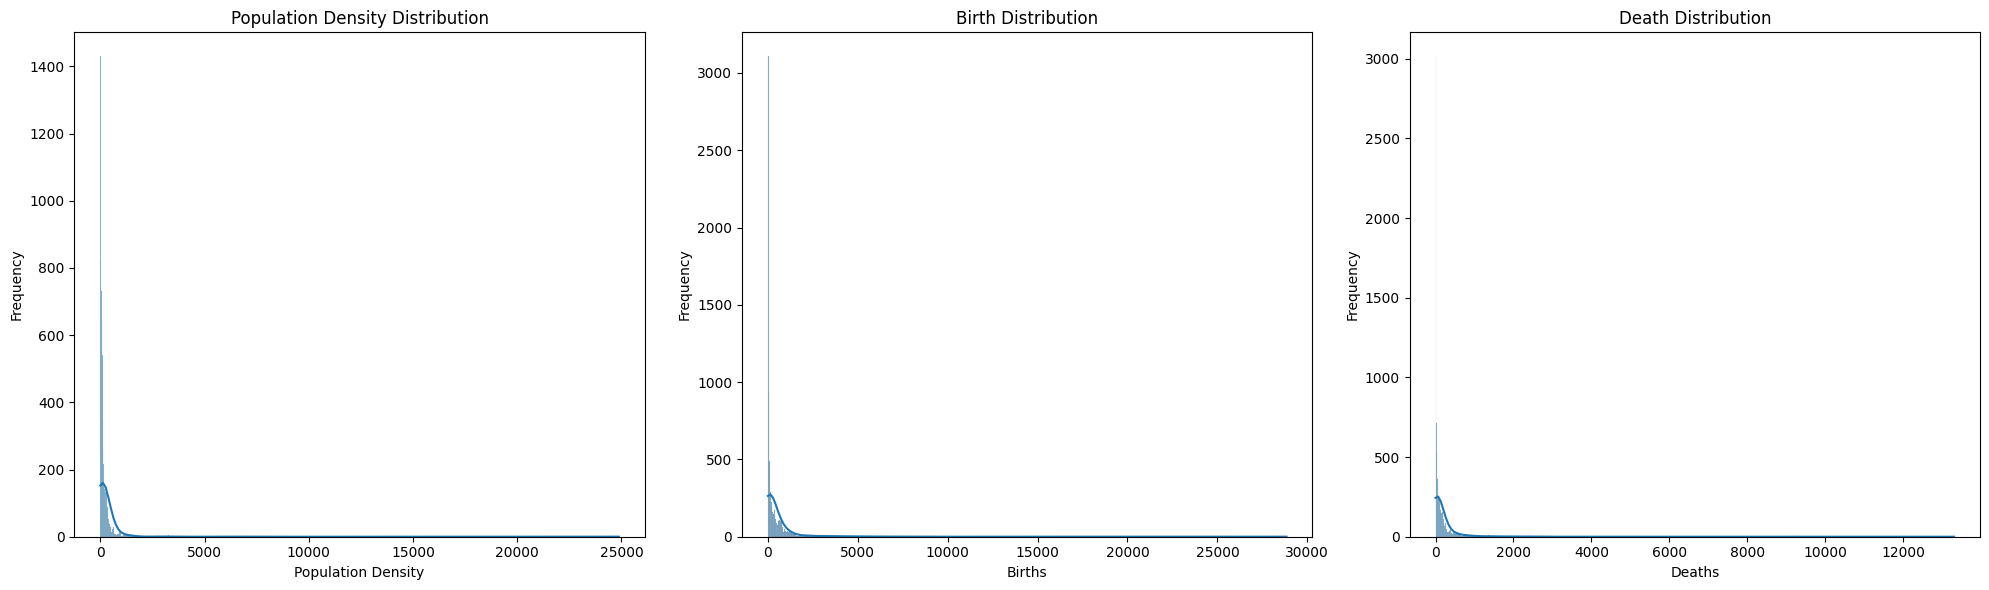

<Figure size 640x480 with 0 Axes>

In [16]:
# Read CSV
df = pd.read_csv("Dataset19.csv", index_col=1)

# Multiple graphs
fig, axs = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 2 columns

# Plotting first histogram
sns.histplot(df['PopDensity'], kde=True, ax=axs[0])
axs[0].set_title('Population Density Distribution')
axs[0].set_xlabel('Population Density')
axs[0].set_ylabel('Frequency')

# Plotting second histogram
sns.histplot(df['Births'], kde=True, ax=axs[1])
axs[1].set_title('Birth Distribution')
axs[1].set_xlabel('Births')
axs[1].set_ylabel('Frequency')

# Plotting third histogram
sns.histplot(df['Deaths'], kde=True, ax=axs[2])
axs[2].set_title('Death Distribution')
axs[2].set_xlabel('Deaths')
axs[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

plt.tight_layout()
plt.show()

### Correlation scatterplots and heatmap matrix

To further analyze this, we can graph a histogram of the correlation between population density, births, and deaths utilizing the Pandas.corr function. This can then be graphed with the seaborn heatmap function. 

Looking at the heatmap, its clear that there is not actually a strong correlation between population density and deaths/births. However, we do see that there is an almost 1:1 correlation between births and deaths, which is interesting but makes sense. 

Furthermore, utilizing Pandas.median function on our dataframe, we can inspect both high and low density populations and their correlation to deaths and births closer. Unfortunately, this tells a similar story to the first heatmap, since both scatterplots do not show a clear trend, meaning that there is no strong correlation. 

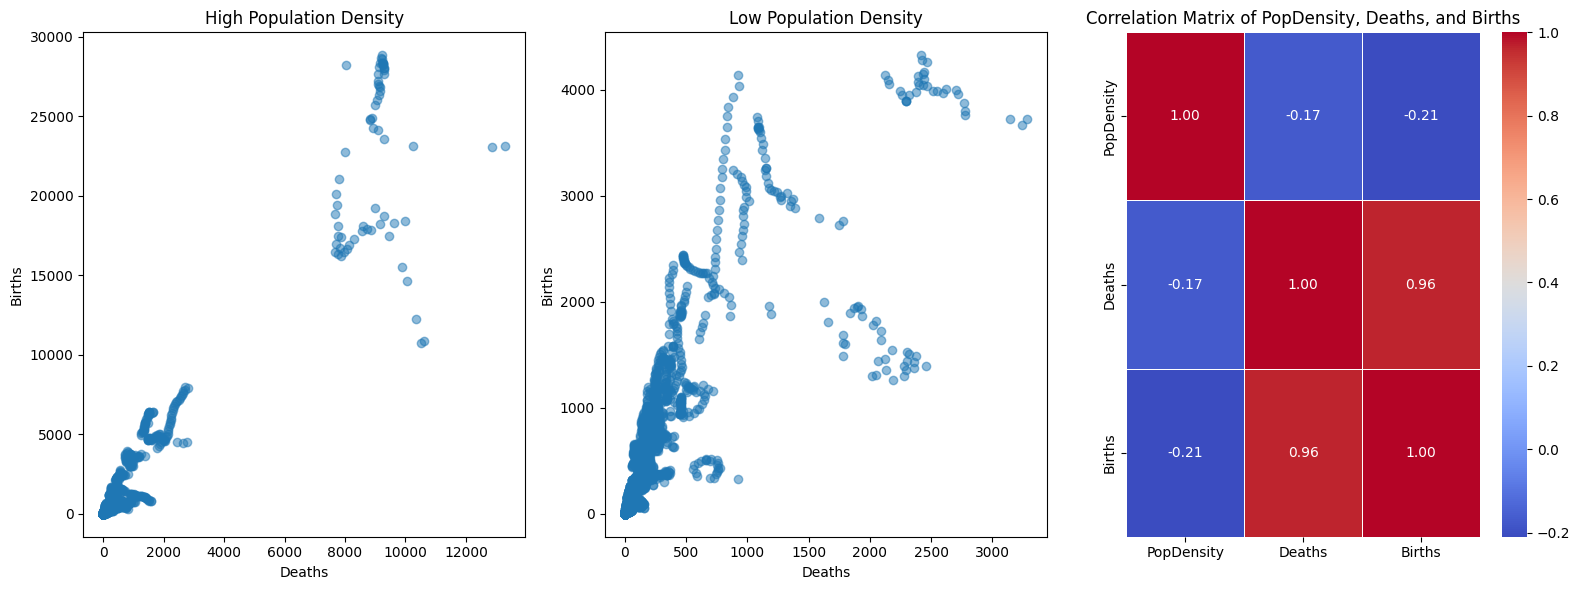

In [20]:
# Pearson correlation
correlation_matrix = df[['PopDensity', 'Deaths', 'Births']].corr()

# Define the threshold for high and low population density
density_threshold = df['PopDensity'].median()  # You can adjust this threshold as needed

# Categorize the data into high and low population density groups
high_density_df = df[df['PopDensity'] >= density_threshold]
low_density_df = df[df['PopDensity'] < density_threshold]

# Calculate Spearman correlation matrix
correlation_matrix = df[['PopDensity', 'Deaths', 'Births']].corr(method='spearman')

# Create subplots for scatter plots and heatmap
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.scatter(high_density_df['Deaths'], high_density_df['Births'], alpha=0.5)
plt.title('High Population Density')
plt.xlabel('Deaths')
plt.ylabel('Births')

plt.subplot(1, 3, 2)
plt.scatter(low_density_df['Deaths'], low_density_df['Births'], alpha=0.5)
plt.title('Low Population Density')
plt.xlabel('Deaths')
plt.ylabel('Births')

plt.subplot(1, 3, 3)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of PopDensity, Deaths, and Births')

plt.tight_layout()
plt.show()

### Conclusion

In conclusion, the hypothesis was proven wrong with the data and there was infact not a strong correlation between population density and births/deaths. We proved this by using an exploratory data analysis that looked at each value separately at first to gauge the data. Then we moved onto generating correlations with Pandas, seaborn, and matplotlib. We graphed both a general historgram and a more dialed in above/below median scatterplot. All ended up showing no strong correlation. 